### 이진 분류 예시

In [10]:
import torch

# 2개의 데이터 예시

# case 1
# 0과 5근처에 데이터를 뿌려놓고 이진 분류

N=20
random0 = torch.randn(int(N/2), 1)
random5 = torch.randn(int(N/2), 1) + 5
class1_data = torch.hstack([random0, random5])
class2_data = torch.hstack([random5, random0])
class1_label = torch.ones(int(N/2), 1)
class2_label = torch.zeros(int(N/2), 1)
X = torch.vstack([class1_data, class2_data])
y = torch.vstack([class1_label, class2_label])

# case 2
# N=100
# radius1 = 0.3 + 0.05 * torch.randn(int(N/2), 1)
# radius2 = 1 + 0.01 * torch.randn(int(N/2), 1)
# theta1 = 2 * torch.pi * torch.rand(int(N/2), 1) - torch.pi
# theta2 = 2 * torch.pi * torch.rand(int(N/2), 1) - torch.pi
# class1_data = torch.hstack([radius1 * torch.cos(theta1), radius1 * torch.sin(theta1)])
# class2_data = torch.hstack([radius2 * torch.cos(theta2), radius2 * torch.sin(theta2)])
# class1_label = torch.ones(int(N/2), 1)
# class2_label = torch.zeros(int(N/2), 1)
# X = torch.vstack([class1_data, class2_data])
# y = torch.vstack([class1_label, class2_label])

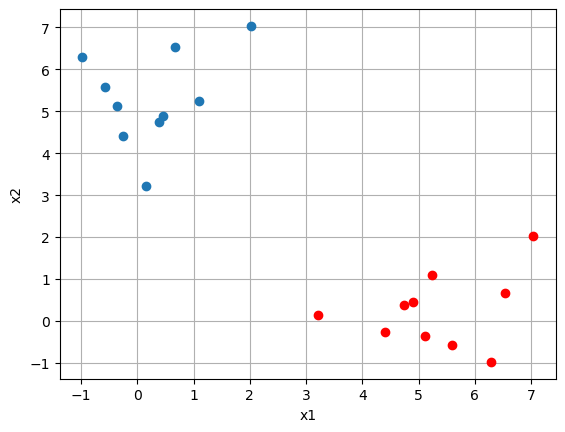

In [11]:
import matplotlib.pyplot as plt
plt.plot(class1_data[:,0], class1_data[:,1], 'o')
plt.plot(class2_data[:,0], class2_data[:,1], 'ro')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

In [12]:
from torch import nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        # case 1, plain
        self.linear = nn.Sequential(nn.Linear(2, 10),
                                    nn.Sigmoid(),
                                    nn.Linear(10, 1),
                                    nn.Sigmoid())

        # # case 1, very simple
        # 좀 다르게 여러개 구현해보기


    def forward(self, x):
        x = self.linear(x)
        return x


model = MLP()
print(model)
print(model(torch.randn(5,2)).shape)

MLP(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=10, out_features=1, bias=True)
    (3): Sigmoid()
  )
)
torch.Size([5, 1])


In [13]:
from torch import optim

LR = 1e-1 # case 1
# LR = 1e-2 # case 2, plain 에서 노드 천 개, deep
# LR = 1e-4 # case 2, very deep relu
EPOCH = 100 # case 1
# EPOCH = 500 # case 2, plain 에서 노드 천 개, deep, very deep relu

# optimizer = optim.SGD(model.parameters(), lr=LR)
optimizer = optim.Adam(model.parameters(), lr=LR) # case 1, deep
# optimizer = optim.Adam(model.parameters(), lr=LR, eps=0, betas=(0.9, 0.999))
# optimizer = optim.Adam(model.parameters(), lr=LR, eps=1e-12, betas=(0.9, 0.999))
criterion = nn.BCELoss()

loss_history = []
grad_history = []
update_size_history = [] # 내 필기용

model.train() # train mode로 전환
for ep in range(EPOCH):
    # inference
    y_hat = model(X)
    # loss
    loss = criterion(y_hat, y)
    # prev weights
    prev = model.linear[0].weight.detach().clone()
    # update
    optimizer.zero_grad() # gradient 누적을 막기 위한 초기화
    loss.backward() # backpropagation
    optimizer.step() # weight update
    # update amount
    grad_history += [torch.sum(torch.abs(model.linear[0].weight.grad)).item()]
    update_size_history += [torch.sum(torch.abs(model.linear[0].weight.detach() - prev)).item()]
    # print loss
    loss_history += [loss.item()]
    print(f"Epoch: {ep+1}, train loss: {loss.item():.4f}")
    print("--"*20)

Epoch: 1, train loss: 0.7084
----------------------------------------
Epoch: 2, train loss: 0.6089
----------------------------------------
Epoch: 3, train loss: 0.5130
----------------------------------------
Epoch: 4, train loss: 0.4056
----------------------------------------
Epoch: 5, train loss: 0.2990
----------------------------------------
Epoch: 6, train loss: 0.2099
----------------------------------------
Epoch: 7, train loss: 0.1433
----------------------------------------
Epoch: 8, train loss: 0.0962
----------------------------------------
Epoch: 9, train loss: 0.0643
----------------------------------------
Epoch: 10, train loss: 0.0435
----------------------------------------
Epoch: 11, train loss: 0.0301
----------------------------------------
Epoch: 12, train loss: 0.0215
----------------------------------------
Epoch: 13, train loss: 0.0158
----------------------------------------
Epoch: 14, train loss: 0.0120
----------------------------------------
Epoch: 15, trai

Text(0, 0.5, 'grad size')

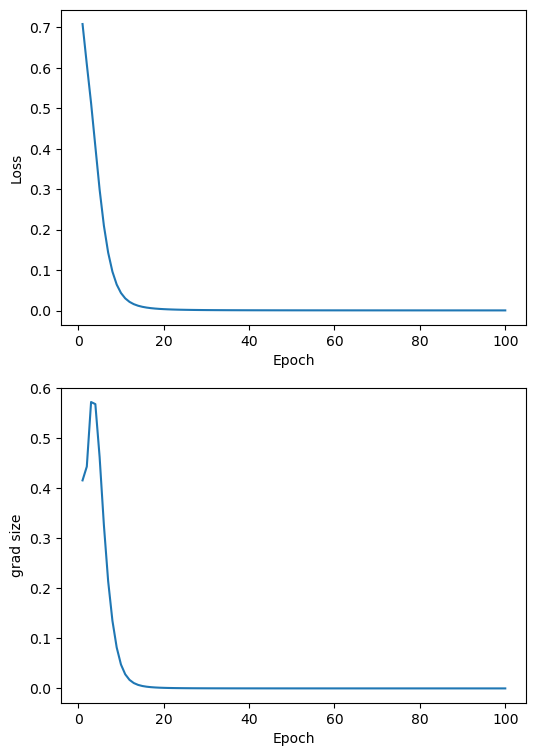

In [14]:
plt.figure(figsize=(6,9))
plt.subplot(2,1,1)
plt.plot(range(1,EPOCH+1), loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.subplot(2,1,2)
plt.plot(range(1,EPOCH+1), grad_history)
plt.xlabel("Epoch")
plt.ylabel("grad size")

False


Text(0.5, 0.5, 'x2')

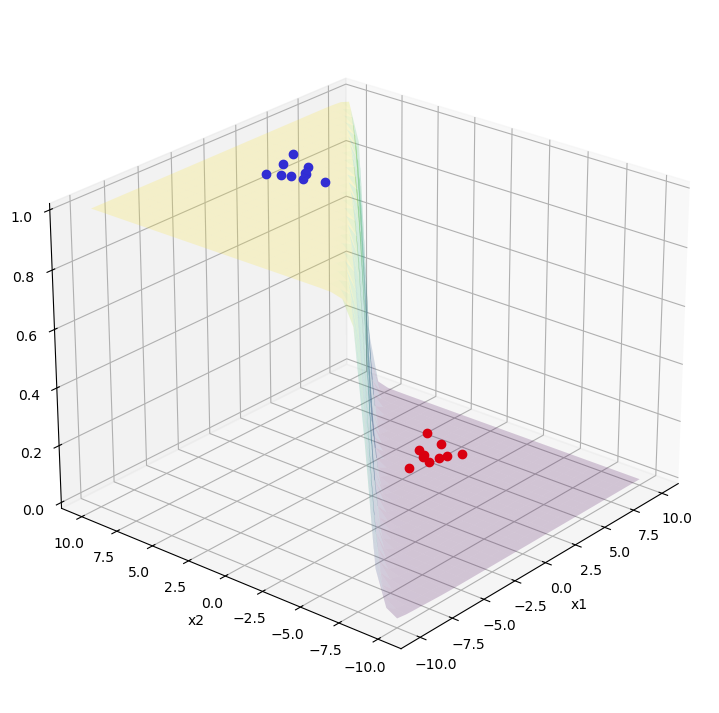

In [15]:
x1_test = torch.linspace(-10, 10, 30) # case 1
x2_test = torch.linspace(-10, 10, 30) # case 1
# x1_test=torch.linspace(-2,2,30) # case 2
# x2_test=torch.linspace(-2,2,30) # case 2
X1_test, X2_test = torch.meshgrid(x1_test, x2_test, indexing='xy')
X_test = torch.cat([X1_test.unsqueeze(dim=2), X2_test.unsqueeze(dim=2)], dim=2)

model.eval() # test mode로 # 1. 해결
with torch.no_grad(): # 2. 해결
    y_hat = model(X_test)
# 1. dropout 혹은 BN 같은거 사용했다면 train mode와 test mode 동작이 다르므로 eval()로
# 2. grad_fn 계산 <- 메모리가 불필요하게 쓰인다
Y_hat = y_hat.squeeze()

print(model.training)
# model.train()
# print(model.training)

plt.figure(figsize=[10, 9]) # figsize=[가로, 세로]
ax = plt.axes(projection="3d")
ax.view_init(elev=25, azim=-140)
ax.plot_surface(X1_test,X2_test,Y_hat.numpy(), cmap="viridis", alpha=0.2)
plt.plot(class1_data[:,0],class1_data[:,1],class1_label.squeeze(), 'bo')
plt.plot(class2_data[:,0],class2_data[:,1],class2_label.squeeze(), 'ro')
plt.xlabel("x1")
plt.ylabel("x2")

### 추가적인 팁

- 만약 파라미터 수가 늘어난다면 LR는 줄여줘야함 -> 대략 파라미터 1000배 늘어날때 0.1배해주면 됨
- 반대로 파라미터 늘어나면 배치 크기는 키워주는게 좋음